# Atividade 1 - Aprendizado de Máquina: modelos descritivos

**Professor: Sérgio Nery Simões**\
**Alunos:**
- Sandro Ricardo De Souza
- Leonardo 

**Data:26/03/2025**

A atividade consiste em replicar o notebooks neste [link](https://colab.research.google.com/drive/1vFRy6g0JPImsri8pItFqXypIU41uI-Bn#scrollTo=8XYcBbN3eI4v), executando cada célula, interpretando e explicando cada saída. Concluir sugerindo aplicações das metodologias aplicadas aqui na Secretaria de Educação do Espírito Santo.  



## Importando módulos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lendo base de dados

In [2]:
path_file = r'../../datasets/segmentation_data.csv'
customer_info = pd.read_csv(path_file)
customer_info.sample(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1525,100001526,1,1,29,1,88669,0,0
1485,100001486,1,1,23,1,138967,1,0
1780,100001781,1,1,40,1,103907,1,0
568,100000569,0,0,41,1,139905,1,0
1247,100001248,0,0,38,1,124554,0,1


In [36]:
customer_info.shape

(2000, 8)

## Dicionário de dados

| Variable | Data Type | Range | Description |
| --- | --- | --- | --- |
| ID | numerical | Integer | Shows a unique identificator of a customer. |
| Sex | categorical | {0,1} | Biological sex (gender) of a customer. 0 = male / 1 = female |
| Marital status | categorical | {0,1} | Marital status of a customer. 0 = single / 1 = non-single |
| Age | numerical | Integer | The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset (Min. age = 18 / Max. age = 78) |
| Education | categorical | {0,1,2,3} | Level of education of the customer. 0=no education / 1=high-school / 2=university / 3=graduate |
| Income | numerical | Real | Self-reported annual income in US dollars of the customer. |
| Occupation | categorical | {0,1,2} | Category of occupation of the customer. 0=unemployed / 1=employee/oficial / 2=management or self-employed |
| Settlement size | categorical | {0,1,2} | The size of the city that the customer lives in. 0=small / 1=mid-size / 2=big |

O dataset contém 2.000 registros e 8 colunas, sem valores nulos.

**Variáveis Numéricas:**
- ID (identificador único).
- Age (idade).
- Income (renda anual).

**Variáveis Categóricas:**
- Sex (0 = masculino, 1 = feminino).
- Marital status (0 = solteiro, 1 = casado/não solteiro).
- Education (0 = sem educação, 1 = ensino médio, 2 = universidade, 3 = pós-graduação).
- Occupation (0 = desempregado, 1 = empregado, 2 = gerente/autônomo).
- Settlement size (0 = cidade pequena, 1 = média, 2 = grande).

## Informações sobre o dataset

Análise estatística resumida dos dados. Verificação de valores nulos e estrutura geral dos dados, incluindo os tipos.

O método `.info()` para entender os tipos de dados em cada coluna. E o método `.describe()` para mostrar informações resumidas sobre as estatísticas regulares.

In [4]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [9]:
customer_info.describe()

,ID,Age,Income
count,2.000000e+03,2000.000000,2000.000000
mean,1.000010e+08,35.909000,120954.419000
std,5.774946e+02,11.719402,38108.824679
min,1.000000e+08,18.000000,35832.000000
25%,1.000005e+08,27.000000,97663.250000
50%,1.000010e+08,33.000000,115548.500000
75%,1.000015e+08,42.000000,138072.250000
max,1.000020e+08,76.000000,309364.000000


Melhorando a apresentação do `.describe`

In [8]:
num_columns = ['ID','Age','Income']
cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']
customer_info[cat_columns] = customer_info[cat_columns].astype('str')
customer_info.describe(include='object').T

,count,unique,top,freq
Sex,2000,2,0,1086
Marital status,2000,2,0,1007
Education,2000,4,1,1386
Occupation,2000,3,1,1113
Settlement size,2000,3,0,989


Na célua anterior, melhoramos a saída do describe para obtermos uma descrição mais acertiva. 

`num_columns = ['ID','Age','Income']`

criamos uma lista chamada num_columns contendo os nomes das colunas numéricas da base de dados. Essas colunas são:

- ID: identificador único do cliente (inteiro).
- Age: idade do cliente (inteiro).
- Income: renda anual do cliente (real).

`cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']`

criamos uma lista chamada `cat_columns` contendo os nomes das colunas categóricas. Essas colunas representam características como sexo, estado civil, nível de educação, ocupação e tamanho da cidade.

`customer_info[cat_columns] = customer_info[cat_columns].astype('str')`

Convertemos todas as colunas categóricas para o tipo string. Isso facilita a análise estatística com métodos como `.describe()`, pois o pandas trata strings como categorias de texto.

`customer_info.describe(include='object').T`

O método `.describe(include='object')` gera estatísticas descritivas apenas para colunas categóricas (strings). Ele retorna informações como:
- count: número de valores não nulos.
- unique: quantidade de categorias distintas.
- top: categoria mais frequente.
- freq: frequência da categoria mais comum.

Por fim, o `.T` (transposição) inverte linhas e colunas para uma visualização mais organizada.

## Valores faltantes

Podemos ver, pela saída do comando `.info()` que não há valores faltantes nos dados.

## Análise exploratória de dados

### Distribuição das variáveis numéricas

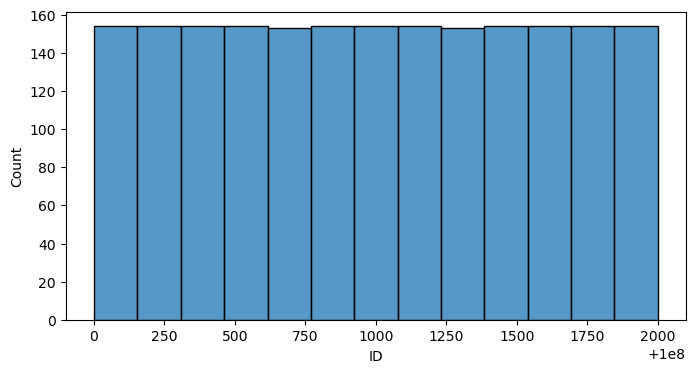

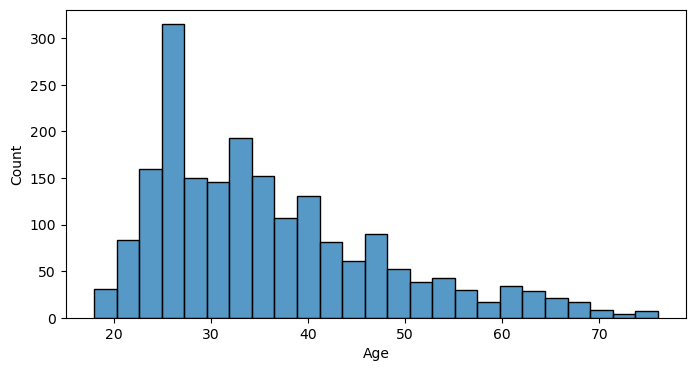

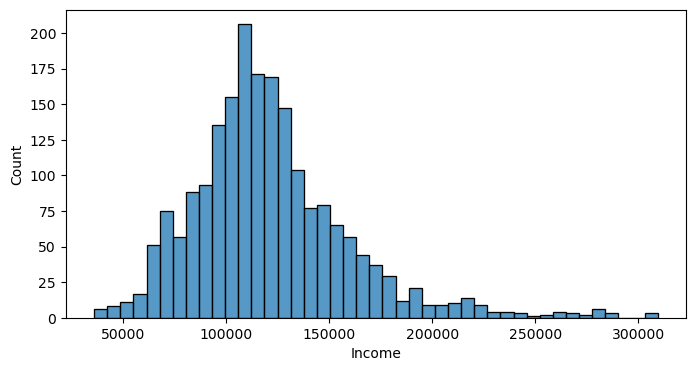

In [13]:
for numerical in num_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=customer_info, x=numerical)

### Distribuição das variáveis numéricas Idade, ID e Renda.

Notamos que `ID` tem uma distribuição uniforme, o que faz sentido, já que é um identificador do cliente e será descartado abaixo.
A variável `Idade` tem uma forte assimetria à direita, gerada por causa do limite inferior em zero da variável. Se estivermos usando o agrupamento K-Means, não haverá necessidade de normalizar o atributo, mas talvez tenhamos que fazer isso para outros modelos. A variável `Renda` tem o mesmo problema de assimetria à direita que 'Idade'. Teremos que ter cuidado com isso, dependendo do modelo que selecionarmos.

### Distribuição das variáveis categóricas

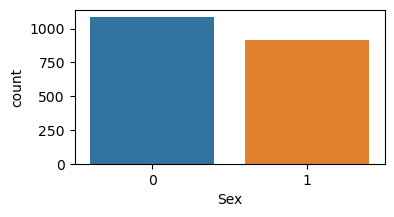

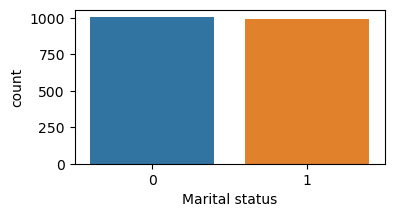

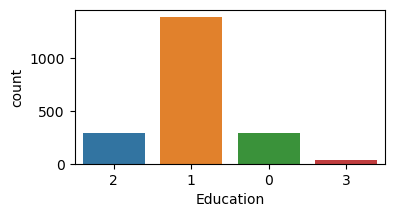

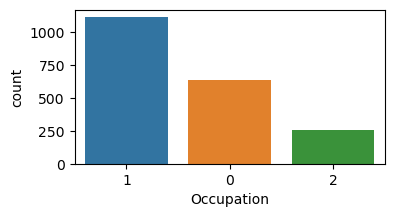

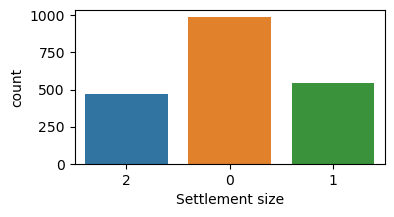

In [29]:
for category in cat_columns:
    plt.figure(figsize=(4,2))
    sns.countplot(data=customer_info, x=category, hue=category)

A análise das variáveis categóricas revelou que os gêneros e o estado civil dos clientes estão equilibrados. A maioria possui ensino médio, enquanto apenas 1,8% tem pós-graduação, sugerindo a fusão das categorias superiores em "universidade". Além disso, as categorias de ocupação e tamanho do assentamento apresentam uma distribuição adequada entre as opções.

### Análise bivariada

#### Características numéricas

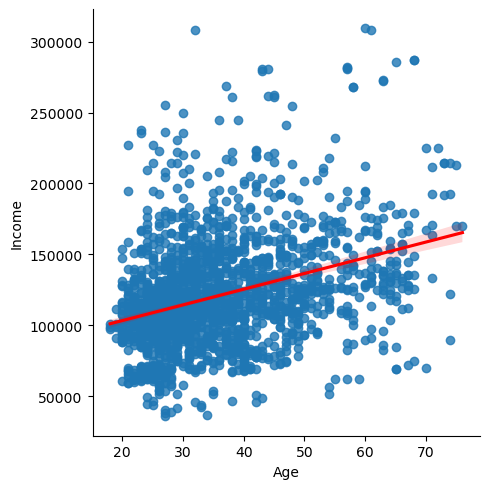

In [30]:
sns.lmplot(x='Age', y='Income',  line_kws={'color': 'red'},  data=customer_info)

Há uma pequena correlação entre as características Idade e Renda. Percebemos que a inclinação da linha é muito pequena, o que mostra que a correlação entre as características é baixa.

In [31]:
import scipy.stats as stats
print(stats.pearsonr(customer_info['Age'], customer_info['Income']))

PearsonRResult(statistic=0.34061016373173514, pvalue=1.6443825442386822e-55)


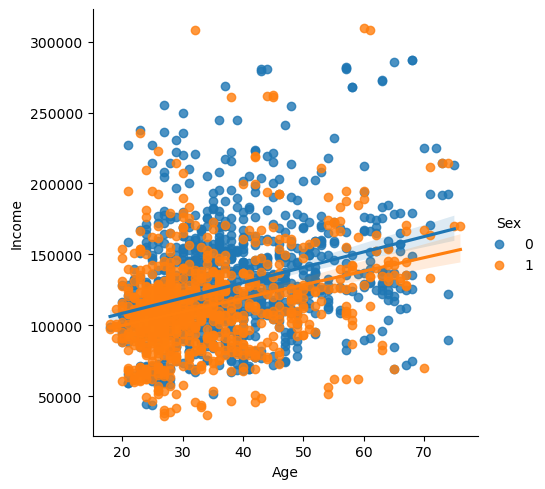

In [32]:
sns.lmplot(x='Age', y='Income', hue='Sex', data=customer_info)

Podemos ver o cálculo do fator de correlação de Pearson, que mostra que os valores têm uma pequena correlação entre eles. Plotando os dados segmentados por gênero, a correlação se mantem para ambos

#### Comparação entre variáveis categóricas e numéricas

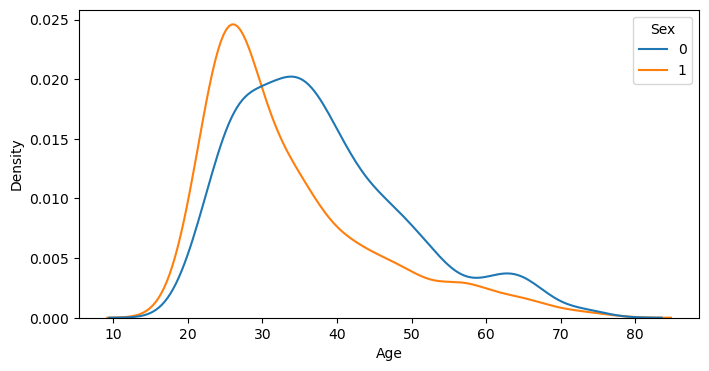

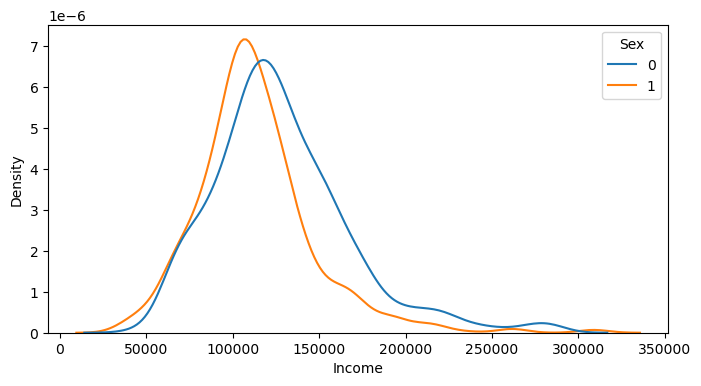

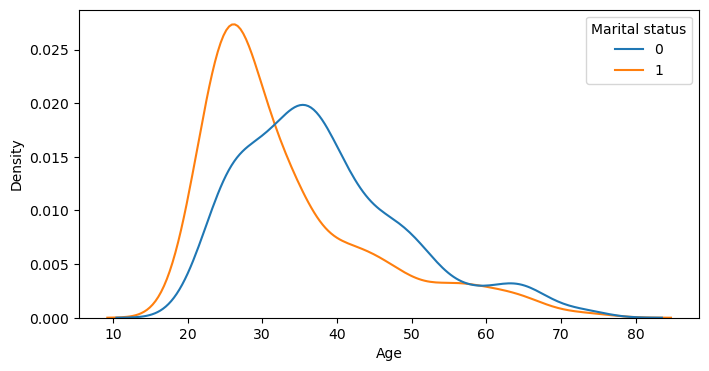

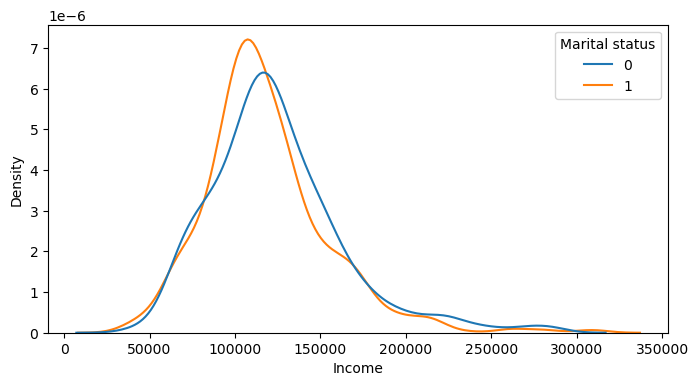

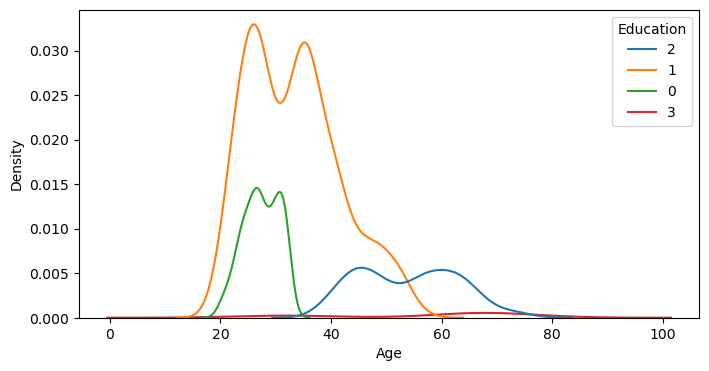

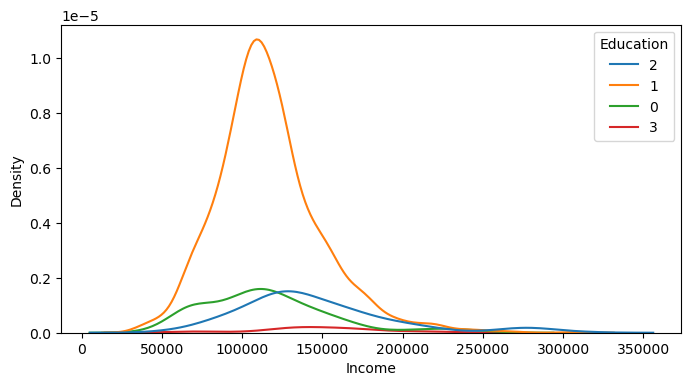

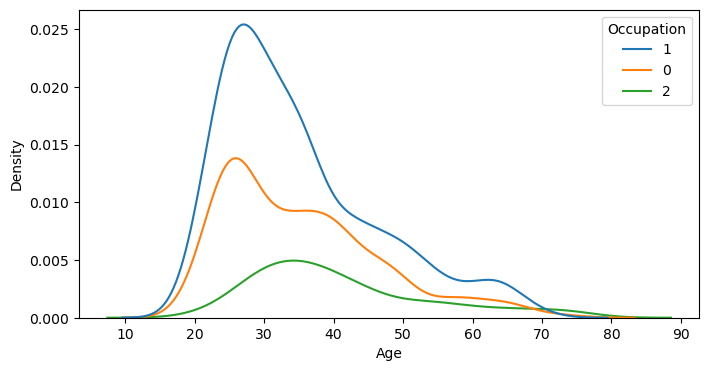

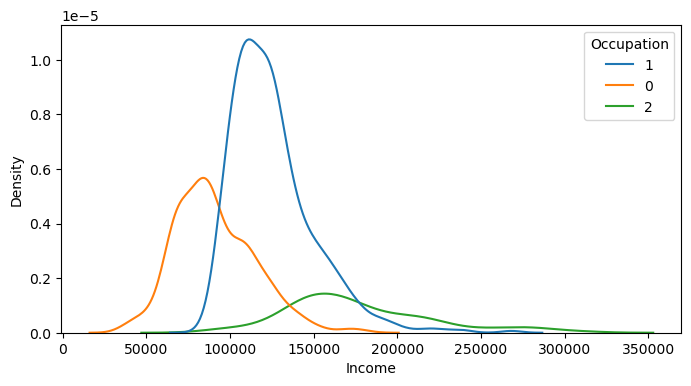

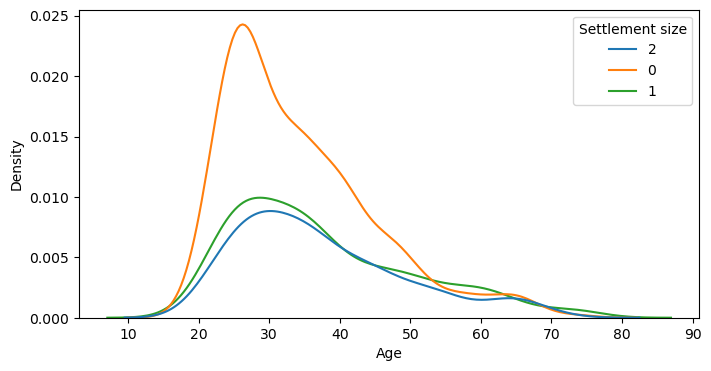

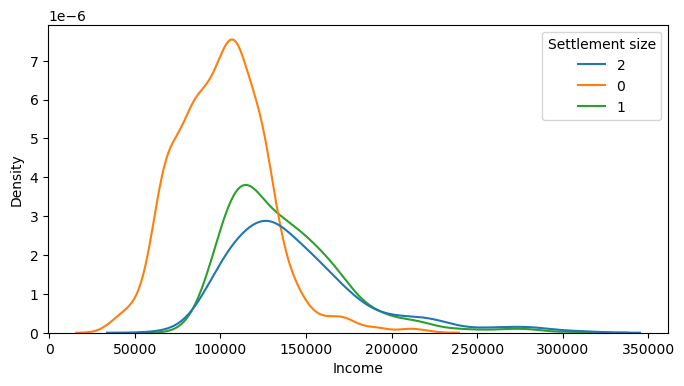

In [33]:
for category in cat_columns:
    for numerical in num_columns:
        if numerical != 'ID':
            plt.figure(figsize=(8,4))
            sns.kdeplot(data=customer_info, x=numerical, hue=category) ## Non-normalized version of this plot by switching kdeplot for histplot

#### Relação entre variáveis categóricas

In [34]:
cat_columns

['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

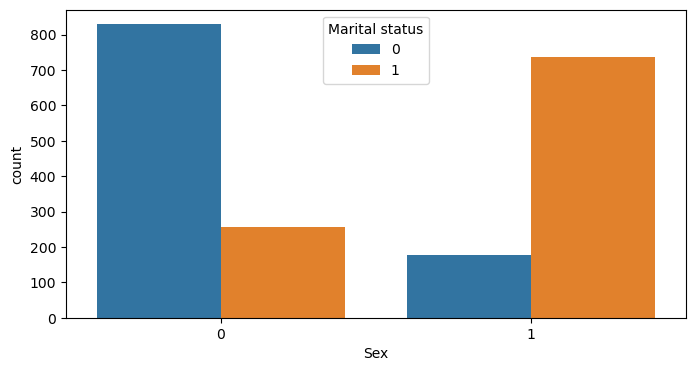

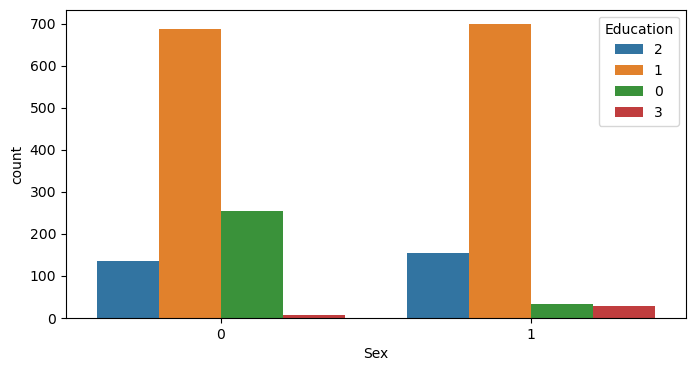

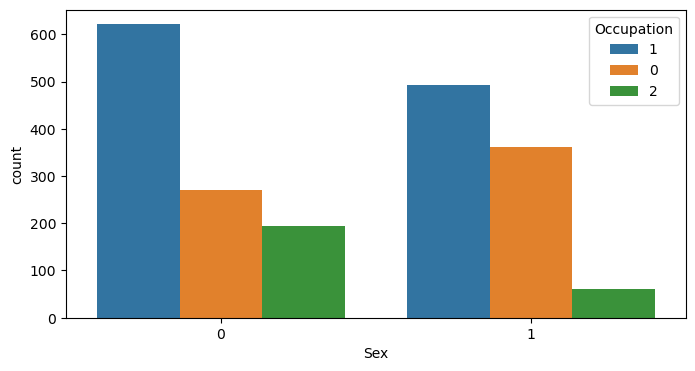

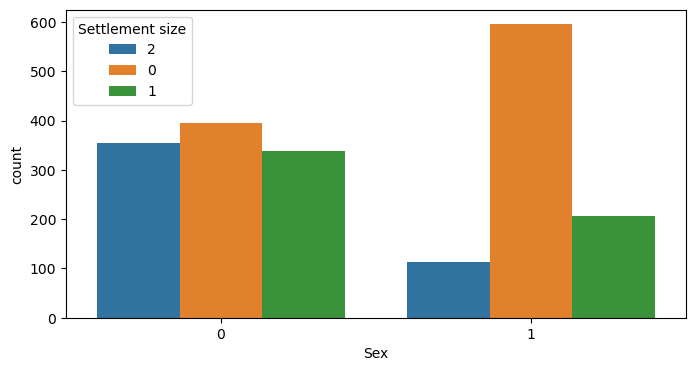

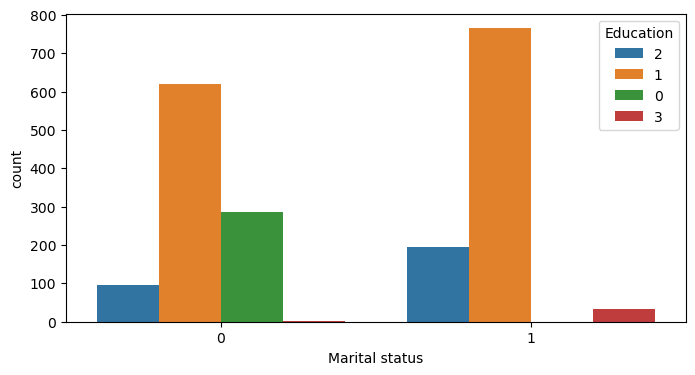

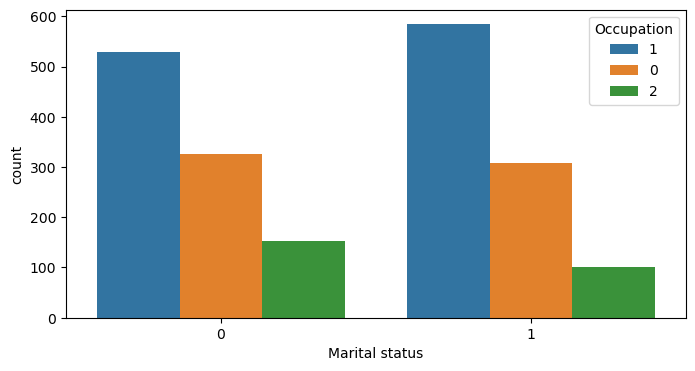

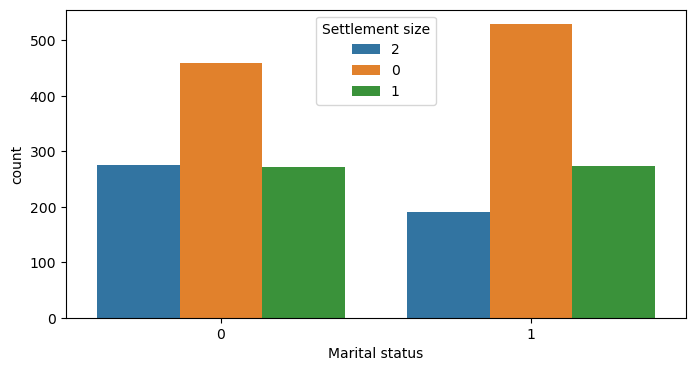

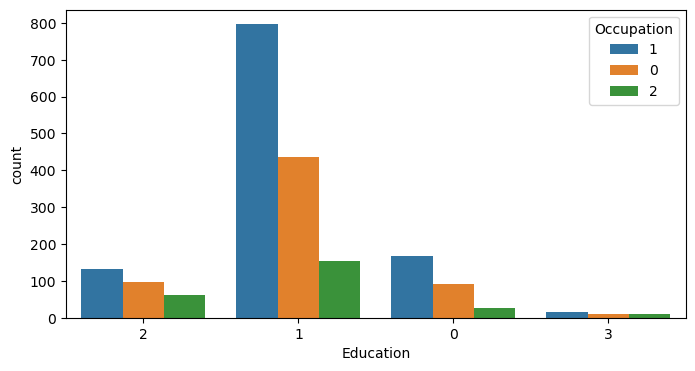

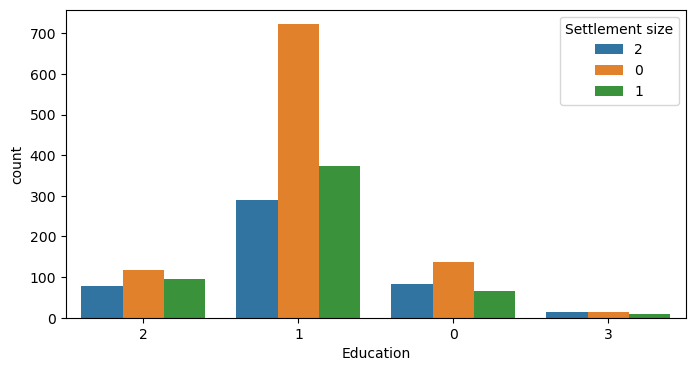

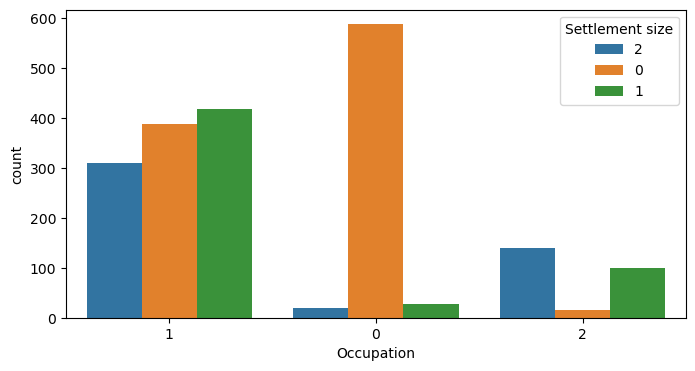

In [35]:
cat_aux = cat_columns.copy()
for category1 in cat_columns:
    cat_aux.pop(0);
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(8,4))
            sns.countplot(data=customer_info, x=category1, hue=category2)

Podemos ter alguns insigts a partir destes dados e relações.

- Leve predominância masculina.
- Há uma distribuição equilibrada entre casados e não casados.
- Poucos clientes têm pós-graduação, o que reforça a ideia de unir as categorias 2 e 3 em "universidade ou mais".
- Maioria dos clientes está empregada.
- A maioria dos clientes vive em cidades pequenas.
- Pessoas desempregadas tendem a viver em cidades pequenas.
- Pessoas casadas tendem a ter educação de nível médio ou pós-graduação.
- Pessoas casadas também tendem a viver em cidades menores.
- Há mais mulheres casadas do que homens.
- Homens tendem a ser empregados com mais frequência.
- Mulheres tendem a ser desempregadas com mais frequência.